# Enron Fraud Exploration with Machine Learning 

Jake Neyer, Feb 2018

## Abstract

The goal of this project is to use machine learning tactics to indentify persons-of-interest in a currated dataset of emails which were released after the Enron Scandal. Developing patterns of fraud and malicious intent in a dataset this large is nearly impossible by simple obervation and human intuition which is why machine learning tactics are essential.


## Background

The Enron scandal that was publicized in October 2001 was perhaps one of the greatest examples of corporate fraud in American history. Through several means of hiding billions of dollars in debt, Enron executives were able to artificially increase and maintain stock value of the compaby. Disgruntled shareholders filed a lawsuit against the company and in December 2, 2001 which led to Enron filing for bankruptcy. Several Enron executives were indicted and sentenced. Addionally, Authur Andersen(a large audit and accounting partnership) was found guilty of illegally destroying documents related to the investigation and ultimately closed its doors because of it.

Read more here: https://en.wikipedia.org/wiki/Enron_scandal

## Loading Dataset

In [803]:
#!/usr/bin/python
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn import tree
import pandas
import numpy
import matplotlib.pyplot as plt

In [804]:
### Loading the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

Translating the dictionary into a pandas dataframe will make exploratory data analysis easier.

In [805]:
#Translating Data in pandas data frame
df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))
# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

## Data Exploration

Taking a look at what makes up the dataset:

In [806]:
#Dataframe of POIs
poi = df[df['poi'] == 1]
poi


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065
COLWELL WESLEY,1200000,27610,-144062,NaN,wes.colwell@enron.com,NaN,16514,40,240,11,...,NaN,101740,True,698242,NaN,288542,1132,1758,1490344,698242
RIEKER PAULA H,700000,214678,-100000,NaN,paula.rieker@enron.com,1635238,33271,82,35,48,...,NaN,1950,True,283649,NaN,249201,1258,1328,1099100,1918887
KOPPER MICHAEL J,800000,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134,NaN,NaN,NaN,...,602671,907502,True,985032,NaN,224305,NaN,NaN,2652612,985032
SHELBY REX,200000,NaN,-4167,NaN,rex.shelby@enron.com,1624396,22884,39,13,14,...,NaN,1573324,True,869220,NaN,211844,91,225,2003885,2493616
DELAINEY DAVID W,3000000,NaN,NaN,NaN,david.delainey@enron.com,2291113,86174,3069,66,609,...,1294981,1661,True,1323148,NaN,365163,2097,3093,4747979,3614261
LAY KENNETH L,7000000,202911,-300000,NaN,kenneth.lay@enron.com,34348384,99832,36,123,16,...,3600000,10359729,True,14761694,NaN,1072321,2411,4273,103559793,49110078
BOWEN JR RAYMOND M,1350000,NaN,-833,NaN,raymond.bowen@enron.com,NaN,65907,27,140,15,...,974293,1621,True,252055,NaN,278601,1593,1858,2669589,252055
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
FASTOW ANDREW S,1300000,NaN,-1386055,NaN,andrew.fastow@enron.com,NaN,55921,NaN,NaN,NaN,...,1736055,277464,True,1794412,NaN,440698,NaN,NaN,2424083,1794412


And now taking a look at the Non-POI attributes.

In [807]:
#Dataframe of Non-POIs
not_poi = df[df['poi'] == 0]
not_poi

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
MORDAUNT KRISTINA M,325000,NaN,NaN,NaN,kristina.mordaunt@enron.com,NaN,35018,NaN,NaN,NaN,...,NaN,1411,False,208510,NaN,267093,NaN,NaN,628522,208510
MEYER ROCKFORD G,NaN,1848227,NaN,NaN,rockford.meyer@enron.com,493489,NaN,28,0,0,...,NaN,NaN,False,462384,NaN,NaN,22,232,1848227,955873
MCMAHON JEFFREY,2600000,NaN,NaN,NaN,jeffrey.mcmahon@enron.com,1104054,137108,48,58,26,...,694862,297353,False,558801,NaN,370448,2228,2355,4099771,1662855
HORTON STANLEY C,NaN,3131860,NaN,NaN,stanley.horton@enron.com,5210569,NaN,1073,44,15,...,NaN,NaN,False,2046079,NaN,NaN,1074,2350,3131860,7256648
PIPER GREGORY F,400000,1130036,-33333,NaN,greg.piper@enron.com,880290,43057,222,61,48,...,NaN,778,False,409554,-409554,197091,742,1238,1737629,880290
HUMPHREY GENE E,NaN,2964506,NaN,NaN,gene.humphrey@enron.com,2282768,4994,17,10,17,...,NaN,NaN,False,NaN,NaN,130724,119,128,3100224,2282768


In [808]:
#Financial Averages
#
#Average POI Salary
print "Average POI Salary: ", poi["salary"].astype(float).mean()
#Average Non-POI Salary
print "Average Non-POI Salary: ", not_poi["salary"].astype(float).mean(), "\n"

#Average POI Deffered Income
print "Average POI Deffered Income: ", poi["deferred_income"].astype(float).mean()
#Average Non-POI Salary
print "Average Non-POI Deffered Income: ", not_poi["deferred_income"].astype(float).mean(), "\n"

#Average POI Deffered Income
print "Average POI Total Payments: ", poi["total_payments"].astype(float).mean()
#Average Non-POI Salary
print "Average Non-POI Total Payments: ", not_poi["total_payments"].astype(float).mean(), "\n"

#Average POI Bonus
print "Average POI Bonus: ", poi["bonus"].astype(float).mean()
#Average Non-POI Bonus
print "Average Non-POI Bonus: ", not_poi["bonus"].astype(float).mean(), "\n"

#Average POI Bonus
print "Average POI total payments: ", poi["total_payments"].astype(float).mean()
#Average Non-POI Bonus
print "Average Non-POI total payments: ", not_poi["total_payments"].astype(float).mean(), "\n"

#Average POI Total Stock Value
print "Average POI Total Stock Value: ", poi["total_stock_value"].astype(float).mean()
#Average Non-POI Total Stock Value
print "Average Non-POI Total Stock Value: ", not_poi["total_stock_value"].astype(float).mean(), "\n"

#Email Averages
#
#Average Emails From POI
print "Average Emails From POI to POI: ", poi["from_poi_to_this_person"].astype(float).mean()
#Average Emails From POI (Non-POIs)
print "Average Emails From POI to Non-POI: ", not_poi["from_poi_to_this_person"].astype(float).mean(), "\n"

#Average Emails to POI
print "Average Emails to POI from POI: ", poi["from_this_person_to_poi"].astype(float).mean()
#Average Emails to POI(Non-POIs)
print "Average Emails to POI from Non-POI: ", not_poi["from_this_person_to_poi"].astype(float).mean(), "\n"

#Average Shared Receipt with POI
print "Average Shared Receipt with POI (POI): ", poi["shared_receipt_with_poi"].astype(float).mean()
#Average Shared Receipt with POI (Non-POIs)
print "Average Shared Receipt with POI (Non-POIs): ", not_poi["shared_receipt_with_poi"].astype(float).mean()


Average POI Salary:  383444.8823529412
Average Non-POI Salary:  601152.5 

Average POI Deffered Income:  -1035313.4545454546
Average Non-POI Deffered Income:  -1170916.6842105263 

Average POI Total Payments:  7913589.777777778
Average Non-POI Total Payments:  4605104.626168224 

Average POI Bonus:  2074999.9375
Average Non-POI Bonus:  2446776.3484848486 

Average POI total payments:  7913589.777777778
Average Non-POI total payments:  4605104.626168224 

Average POI Total Stock Value:  9165670.944444444
Average Non-POI Total Stock Value:  6375338.537037037 

Average Emails From POI to POI:  97.78571428571429
Average Emails From POI to Non-POI:  58.5 

Average Emails to POI from POI:  66.71428571428571
Average Emails to POI from Non-POI:  36.27777777777778 

Average Shared Receipt with POI (POI):  1783.0
Average Shared Receipt with POI (Non-POIs):  1058.5277777777778


There are some significant differences between POIs and Non-POIs, specificallly in attributes such as salary, bonus, total payments, stock value, email from POI, emails to POI, and emails shared with POIs.

In [809]:
#Number of total data points
len(df)

146

In [810]:
#Number of POI data points
len(poi)

18

In [811]:
#Number of Non-POI data points
len(not_poi)

128

In [812]:
#Number of Features
len(df.columns)

21

There are 146 total data points in this dataset. Of those 146 data points, there are 18 POIs and 128 Non-POI entries. Each entry has 24 different features. 

## Indentifying Outliers

In [813]:
#Determining 99th quantile of salaries
q = df["salary"].astype(float).quantile(0.99)
salary_outliers = df[df["salary"] > q]
salary_outliers = salary_outliers[salary_outliers['salary'] != 'NaN']
salary_outliers

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619,32083396,-27992891,1398517,NaN,311764000,5235198,NaN,NaN,NaN,...,48521928,42667589,False,130322299,-7576788,26704229,NaN,NaN,309886585,434509511


Clearly this entry is an anomaly in our dataset and an outlier. This is most likely just a issue with the formatting on the dataset we loaded.

In [814]:
#Removing TOTAL entry from data frame
salary_outliers = salary_outliers.drop(['TOTAL'])
salary_outliers

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


In [815]:
df.drop(['TOTAL'],inplace=True)

In [816]:
#Looking at List of Employees
df.index.tolist()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

Notice the entry:`THE TRAVEL AGENCY IN THE PARK',` this is clearly not an employee. 

In [817]:
#Removing Bad Entry
df.drop(['THE TRAVEL AGENCY IN THE PARK'],inplace=True)

In [818]:
#Looking at EUGENE LOCKHART
df.loc['LOCKHART EUGENE E']

bonus                          NaN
deferral_payments              NaN
deferred_income                NaN
director_fees                  NaN
email_address                  NaN
exercised_stock_options        NaN
expenses                       NaN
from_messages                  NaN
from_poi_to_this_person        NaN
from_this_person_to_poi        NaN
loan_advances                  NaN
long_term_incentive            NaN
other                          NaN
poi                          False
restricted_stock               NaN
restricted_stock_deferred      NaN
salary                         NaN
shared_receipt_with_poi        NaN
to_messages                    NaN
total_payments                 NaN
total_stock_value              NaN
Name: LOCKHART EUGENE E, dtype: object

The TOTAL entry in the dataset was most certainly an outlier. It was actually an accumulation of multiple different entries in the same dataset, as opposed to a single unique entry. Because of this, I drop it from the dataset in the line above `df.drop(['TOTAL'],inplace=True)`. This will keep it from futher intruding in the data exploration process and moreover, will keep it from ruining the results of the classifiers. Similarly, I remove the Travel Agency in the park entry: `df.drop(['THE TRAVEL AGENCY IN THE PARK'],inplace=True)` because it is not a valid employee of the company. And finally, I will remove the `EUGENE LOCKHART` because it had no information. It was a completely empty entry.

## Additional Features

There may be some ambiguity in the email features. For example, the total number of emails to, from, and shared with POIs might not be the best indicator for those particular metrics, but rather a more descriptive metric may be a ratio of the total emails sent, recieved, and shared to the total emails sent to POIs, recieved from POIs, and shared with POIs.

In [819]:
#Ratio of Emails from POI
df['from_poi_ratio'] = df['from_poi_to_this_person'].astype(float) / (df['from_poi_to_this_person'].astype(float) \
                                                                      + df['from_messages'].astype(float))

#Ratio of Emails to POI
df['to_poi_ratio'] = df['from_this_person_to_poi'].astype(float) / (df['from_this_person_to_poi'].astype(float) \
                                                                    + df['to_messages'].astype(float))

#Ratio of Shared Emails with POI
df['shared_poi_ratio'] = df['shared_receipt_with_poi'].astype(float) / (df['shared_receipt_with_poi'].astype(float) \
                                                                       + df['from_messages'].astype(float) +  \
                                                                       df['from_poi_to_this_person'].astype(float))


## Building Dataset and Feature List

In [820]:
# Creating a dictionary from the dataframe
df = df.replace(numpy.nan,'NaN', regex=True)
df.drop('email_address', axis=1, inplace=True)
my_dataset = df.to_dict('index')

In [821]:
#Making list of all features in dataframe
total_features_list = df.columns.values

#Printing List
print total_features_list

['bonus' 'deferral_payments' 'deferred_income' 'director_fees'
 'exercised_stock_options' 'expenses' 'from_messages'
 'from_poi_to_this_person' 'from_this_person_to_poi' 'loan_advances'
 'long_term_incentive' 'other' 'poi' 'restricted_stock'
 'restricted_stock_deferred' 'salary' 'shared_receipt_with_poi'
 'to_messages' 'total_payments' 'total_stock_value' 'from_poi_ratio'
 'to_poi_ratio' 'shared_poi_ratio']


I am going to be using the email ratios and total stock value in my feature list for building my machine learning model.

In [822]:
#Creating my feature list

my_feature_list = ['poi','bonus', 'deferral_payments', 'deferred_income', 'director_fees',
 'exercised_stock_options', 'expenses', 'from_messages',
 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
 'long_term_incentive', 'other', 'restricted_stock',
 'restricted_stock_deferred' ,'salary', 'shared_receipt_with_poi',
 'to_messages', 'total_payments' ,'total_stock_value', 'from_poi_ratio',
 'to_poi_ratio', 'shared_poi_ratio']


The from_poi_ratio, to_poi_ratio, and shard_poi_ratio were features I created to get a more granular number of how much communcitaion was made between each individual and individuals labled as POIs. For instance, if someone who sends a massive amounts of emails has 10 emails sent to a POI, it is less important than someone who sends few emails that sends 10 emails to a POI. So what I did was calculate separate ratios for all emails sent, recieved and shared with all emails sent, recieved and shared with POIs; the resulting features are from_poi_ratio, to_poi_ratio, and shard_poi_ratio.

## Creating Lables and Features for Models

In [823]:
#my_feature_list features/lables

# Extracting features and labels from dataset for local testing
from sklearn.cross_validation import StratifiedShuffleSplit

data = featureFormat(my_dataset, my_feature_list, remove_NaN=True, sort_keys = True)

labels, features = targetFeatureSplit(data)
cv = StratifiedShuffleSplit(labels, 1000)
for train_idx, test_idx in cv:
    features_train = []
    features_test = []
    labels_train = []
    labels_test = []
    for ii in train_idx:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_idx:
        features_test.append(features[jj])
        labels_test.append(labels[jj])

One thing to note here is the effort put into validation. A classic mistake with missing validation is overfitted the data. So here, the labels and features are both split into training and testing sets using the `StratifiedShuffleSplit` algorithm provided in the sklearn library. This algorithm merges StratifiedKFold and ShuffleSplit algorithms and returns randomized folds in the dataset. This will ensure that the data will be split for training and testing so that either set will not have an overwhelming percentage of POI or Non-POI entries.

## Feature Selection

Feature ranking:
1. Feature: director_fees (0.326927)
2. Feature: other (0.185797)
3. Feature: poi (0.149486)
4. Feature: from_poi_ratio (0.108436)
5. Feature: exercised_stock_options (0.093831)
6. Feature: salary (0.064935)
7. Feature: to_poi_ratio (0.057143)
8. Feature: from_poi_to_this_person (0.013445)
9. Feature: restricted_stock_deferred (0.000000)
10. Feature: restricted_stock (0.000000)
director_fees
other
poi
from_poi_ratio
exercised_stock_options
salary
to_poi_ratio
from_poi_to_this_person
restricted_stock_deferred
restricted_stock


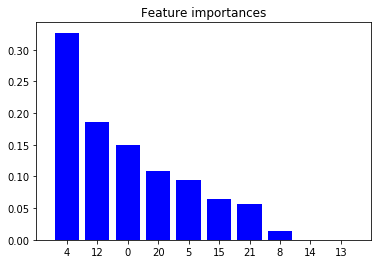

In [824]:
from sklearn import tree

# fit an Extra Trees model to the data
model = tree.DecisionTreeClassifier()
model.fit(features_train, labels_train)


#Find and List Top 1o Features Based on Importance
indices = numpy.argsort(model.feature_importances_)[::-1]
top_features = 10
new_indices = indices[:top_features]


# Print the feature ranking
print("Feature ranking:")

new_feature_list = []
for f in range(top_features):
    i = my_feature_list[new_indices[f]]
    new_feature_list.append(i)
    print("%d. Feature: %s (%f)" % (f + 1, my_feature_list[new_indices[f]], 
                                    model.feature_importances_[new_indices[f]]))

for i in new_feature_list:
    print i
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_features), model.feature_importances_[new_indices],
       color="b", align="center")

plt.xticks(range(top_features), new_indices)
plt.xlim([-1, top_features])
plt.show()

In [825]:
#Building Final Feature List
for i in range(len(new_feature_list) - 1):
    if new_feature_list[i] == 'poi':
        new_feature_list.pop(i)

new_feature_list.insert(0, "poi")
my_feature_list = new_feature_list

print my_feature_list

['poi', 'director_fees', 'other', 'from_poi_ratio', 'exercised_stock_options', 'salary', 'to_poi_ratio', 'from_poi_to_this_person', 'restricted_stock_deferred', 'restricted_stock']


To select my features, I used a decision tree. The features with the greatest weights were selected to be used in the proceeding classifers. I used a rounded `.1` feature importance as the cutoff. So after rounding up, `from_poi_ratio` was the last feature that I included in my final feature list.

## New Feature Justification

The `from_poi_ratio` here is a great example of why the creation of this feature was justified. It has a consistently high feature importance, and as shown above it has a feature importance of `0.095258`. The ratio of email communication comes in to play here while the overall number of emails is not even in the top ten features.

In [826]:
#Using New Features
# Extracting features and labels from dataset for local testing
from sklearn.cross_validation import StratifiedShuffleSplit

data = featureFormat(my_dataset, my_feature_list, remove_NaN=True, sort_keys = True)

labels, features = targetFeatureSplit(data)
cv = StratifiedShuffleSplit(labels, 1000)
for train_idx, test_idx in cv:
    features_train = []
    features_test = []
    labels_train = []
    labels_test = []
    for ii in train_idx:
        features_train.append(features[ii])
        labels_train.append(labels[ii])
    for jj in test_idx:
        features_test.append(features[jj])
        labels_test.append(labels[jj])

## Building and Testing Classifiers

In order to get some sort of baseline, I will start with a simple Naive Bayes classifer.

In [827]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#Constructing Naive Bayes Classifier
clf = GaussianNB()
#Ffitting classifier
clf.fit(features_train, labels_train)
#Storing predicted values in a list
nb_pred = clf.predict(features_test)

print accuracy_score(labels_test, nb_pred)
print "Precision: ",precision_score(labels_test, nb_pred, average='micro')
print "Recall: ",recall_score(labels_test, nb_pred, average='micro')

0.26666666666666666
Precision:  0.26666666666666666
Recall:  0.26666666666666666


The NB classifier scored an accuracy of about 90%. I will continue to try other classifiers to see if anything is better.

Next I wil try a Support Vector Machine to see what kind of results I can yeild.

In [828]:
from sklearn.svm import SVC

#Creating a SVM
clf = SVC()
#Fitting the SVM
clf.fit(features_train, labels_train)
#Making a list of predicitions
svm_pred = clf.predict(features_test)

print accuracy_score(labels_test, svm_pred)
print "Precision: ",precision_score(labels_test, svm_pred, average='micro')
print "Recall: ",recall_score(labels_test, svm_pred, average='micro')

0.8666666666666667
Precision:  0.8666666666666667
Recall:  0.8666666666666667


Wow! This is a pretty good accuracy score. I will try a random forest classifier to see if it is any better.

In [829]:
from sklearn.ensemble import RandomForestClassifier

#Constructing Random Forest
clf = RandomForestClassifier()
#Fitting classifier
clf.fit(features_train, labels_train)
#Making list of predictions
rf_pred = clf.predict(features_test)

print accuracy_score(labels_test, rf_pred)
print "Precision: ",precision_score(labels_test, rf_pred, average='micro')
print "Recall: ",recall_score(labels_test, rf_pred, average='micro')

0.8
Precision:  0.8
Recall:  0.8


The random forest classifier is not bad with over 90% accuracy right out of the box.

The classifier I ultimately chose to go with was the Random Forest Classifier. It did not have the best accuracy right out of the box, but due to its plethora of tunable parameters, I think it will improve significantly after the tuning process of this project. Random Forest Classifiers(RFCs) are great for supervised classifiation problem sets such as the one we are working with. Essentially, RFCs are a culmination of simpler decision trees. In this case, I think it will be a great fit for our problem set.


## Scaling

I did not scale any of the features in this particular instance. As I am using a Random Forest Classifier, scaling is not necessarily an important step. Unlike SVMs, K-nearest neighbors, and logistic regression where normalization is essential, RFCs do not particularly need scaled features to perform.

## Tuning Classifier

In [830]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#Constructing Random Forest
rfc = RandomForestClassifier()

param_dist = {"max_depth": [1, 50],
              "n_estimators": [1, 10],
              "max_features": sp_randint(1, len(my_feature_list)),
              "max_leaf_nodes": sp_randint(2, len(my_feature_list)),
              "min_samples_split": sp_randint(2,len(my_feature_list)),
              "min_samples_leaf": sp_randint(2, len(my_feature_list)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 50
gs = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search)

gs.fit(features_train, labels_train)

clf = gs.best_estimator_
rs_pred = clf.predict(features_test)

print accuracy_score(labels_test, rs_pred)
print "Precision: ",precision_score(labels_test, rs_pred, average='micro')
print "Recall: ",recall_score(labels_test, rs_pred, average='micro')

0.8
Precision:  0.8
Recall:  0.8


Tuning parameters in machine learning models is sometimes refered to as tuning the hyperparameters as the parameters are often noted as the coefficients of the algorithm. In this case, tuning the hyperparamters means adjusted the way the classifier is constructed by changing items such as the max depth, max features, minimum samples required to split, et cetera. Changing these hyperparameters can significantly affect the way the classifier performs. I used the RandomizedSearchCV algorithm to determine hyperparamters due to its reliable results and perfomance. As opposed to something like GridSearchCV it has extremely good perfomance benefits without much trade-off in effectiveness.

## Evaluation Metrics

In [831]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print "Precision: ",precision_score(labels_test, rf_pred, average='micro')
print "Recall: ",recall_score(labels_test, rf_pred, average='micro')

Precision:  0.8
Recall:  0.8


The two evaluation metrics I chose to use were recall and precision. The recall measures the number of items that can be correctly identified. For example, if there are 10 POIs in this dataset(there are more than that) and this classifier can only say that 9 people are POIs then the recall if 0.90. The precisions measures the accuracy of the indetification. For example, if there are once again 10 POIs in this dataset, if the classifier determines 10 people are POIs, but of those 10 people only 9 ARE actually POIs, then the precision is 0.90.


## Dumping Classifier for Reuse

In [832]:
#Dumping Classifier
dump_classifier_and_data(clf, my_dataset, my_feature_list)

## Sources

https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

https://en.wikipedia.org/wiki/Random_forest

http://scikit-learn.org/stable/documentation.html

https://discussions.udacity.com/t/project-fear-strugging-with-machine-learning-project/198529/2

https://discussions.udacity.com/t/featureformat-function-not-doing-its-job/192923/2

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
